In [1]:
import os;os.environ["TF_USE_LEGACY_KERAS"]="1"

from tensorflow import keras
import tensorflow as tf
from src.preprocessing import dataset_preprocessing
from src.plotting import plotting_confusion_matrix, plot_test_images
from src.evaluation import evaluate_lite_model

In [2]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
SCALE = 127.5
OFFSET = -1

PATH = "datasets/testing_dataset_07"

LOADED_MODEL = "09_mobilenetv2_0.35_224"

In [3]:
dataset = keras.utils.image_dataset_from_directory(PATH,
                                                   shuffle = True,
                                                   batch_size = BATCH_SIZE,
                                                   image_size = (IMAGE_SIZE, IMAGE_SIZE))

class_names = dataset.class_names
number_classes = len(class_names)

training_dataset, validation_dataset, testing_dataset = dataset_preprocessing(dataset,
                                                                              train_size=0,
                                                                              validation_size=0, 
                                                                              augmentation_flag = True, 
                                                                              rescaling_flag = True, 
                                                                              prefetch_flag = True, 
                                                                              scale = SCALE, 
                                                                              offset = OFFSET)

Found 189 files belonging to 9 classes.



In [4]:
class_names

['cioccolata',
 'cioccolata senza paletta',
 'errore',
 'espresso',
 'espresso senza paletta',
 'macchiato',
 'macchiato senza paletta',
 'the',
 'the senza paletta']

## KERAS MODELS

In [5]:
model = keras.models.load_model('saved_models/' + LOADED_MODEL + '.keras')

ValueError: Layer 'conv2d_303' expected 1 variables, but received 0 variables during loading. Expected: ['conv2d_303/kernel:0']

In [14]:
model.compile(optimizer = keras.optimizers.Adam(1e-3),
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [15]:
_, accuracy = model.evaluate(testing_dataset, verbose = 0)
print('Accuracy: ', round(accuracy*100, 3), '%')



Accuracy:  85.714 %


6/6 [==============================] - 9s 298ms/step


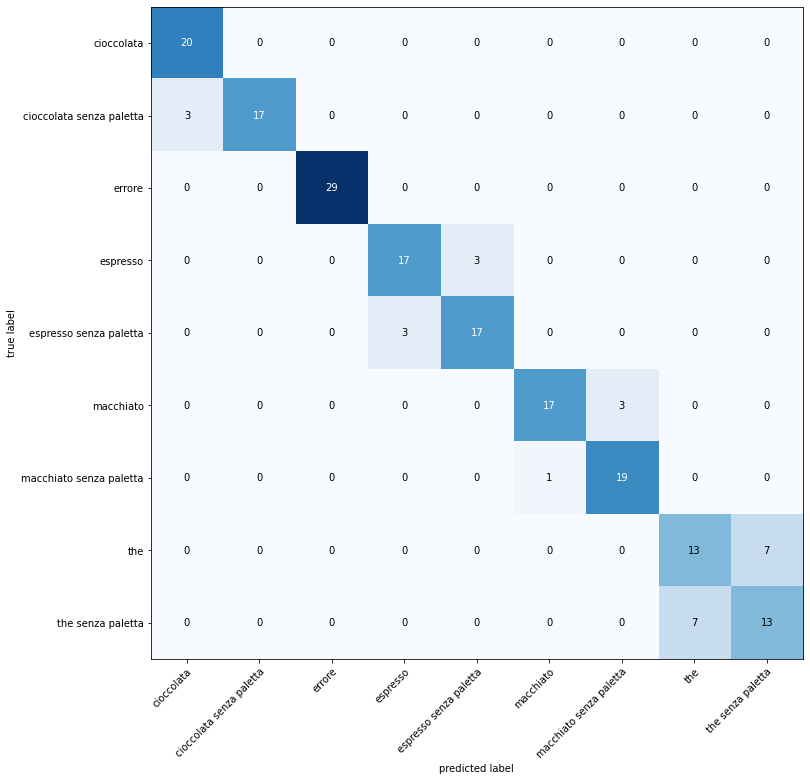

In [16]:
plotting_confusion_matrix(testing_dataset, model, class_names)

In [ ]:
plot_test_images(model, testing_dataset, class_names, num_images = 16, scaling = SCALE, offset=OFFSET)

## TFLITE MODELS

Processing test dataset. Batch to process:  3 

Accuracy of compressed model model: 94.18 %


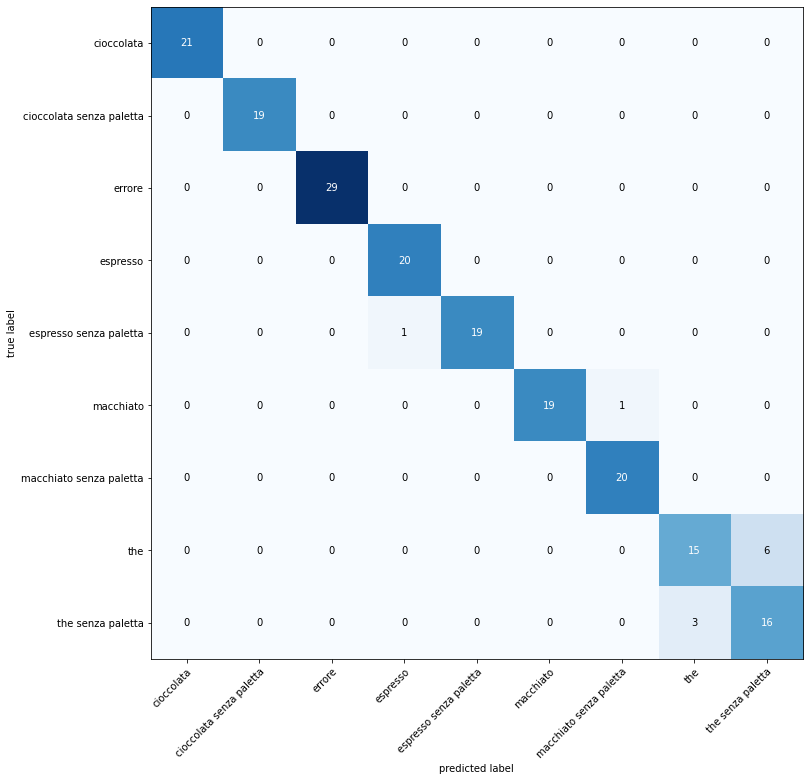

In [7]:
interpreter = tf.lite.Interpreter(model_path='saved_lite_models/' + LOADED_MODEL + '.tflite')
interpreter.allocate_tensors()

accuracy = evaluate_lite_model(interpreter, testing_dataset, class_names=class_names, show_confusion_matrix=True)
print("Accuracy of compressed model model: %.2f" %(accuracy*100) , '%')